<h1>
<font color="#ff2e2e">
Color Space Conversion
</font>
</h1>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

<h3><font color = "#079e05"> This function is used to plot your result </font></h3>

a)


In [ ]:
arr = np.array([50, 70 ,130])
result = np.zeros(4)

#conver to 0 to 1
r = arr[0] / 255
g = arr[1] / 255
b = arr[2] / 255

k = 1 - max(r , g , b)
result[3] = k
result[2] = (1 - b - k)
result[1] = (1 - g - k)
result[0] = (1 - r - k)
result

array([0.31372549, 0.23529412, 0.        , 0.49019608])

In [ ]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

<h3><font color = "#079e05"> BGR to YCbCr </font></h3>

In [ ]:
def convert_to_ycbcr(image):
    '''
    Converts the color space of the input image to the YCbCr color space.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''

    #############
    # Your code #
    result = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    #############
    
    return result

<h3><font color = "#079e05"> BGR to HSV </font></h3>

In [ ]:
def convert_to_hsv(image):
    '''
    Converts the color space of the input image to the HSV color space.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''

    #############
    # Your code #
    result = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    #############
        
    return result

<h3><font color = "#079e05"> Show the result </font></h3>

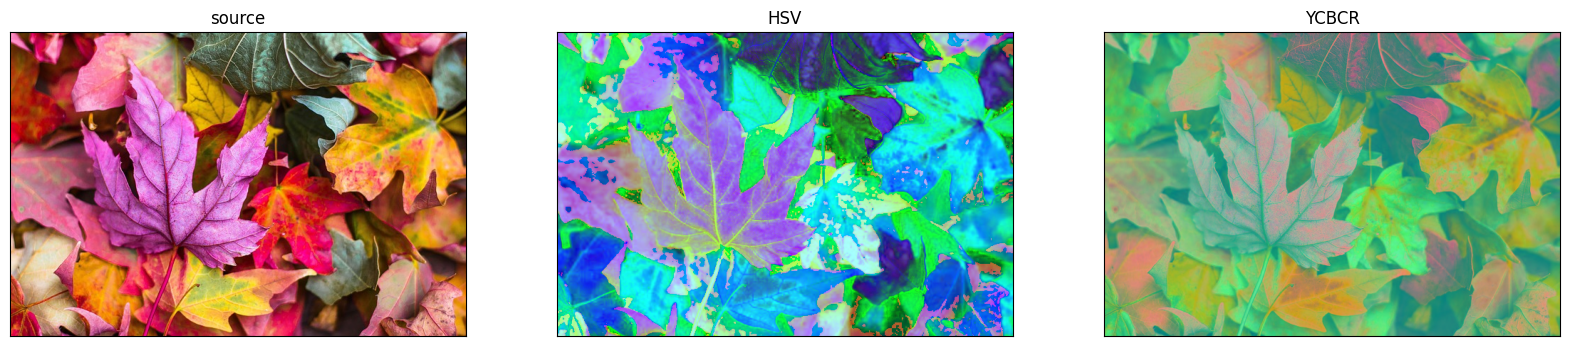

In [ ]:
image_list = []
image = cv2.imread(os.path.join('images/Q1', '1.jpg'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])
image_list.append([convert_to_hsv(image), 'HSV', 'img'])
image_list.append([convert_to_ycbcr(image), 'YCBCR', 'img'])
plotter(image_list,1 , 3, True, 20, 10, '2A')

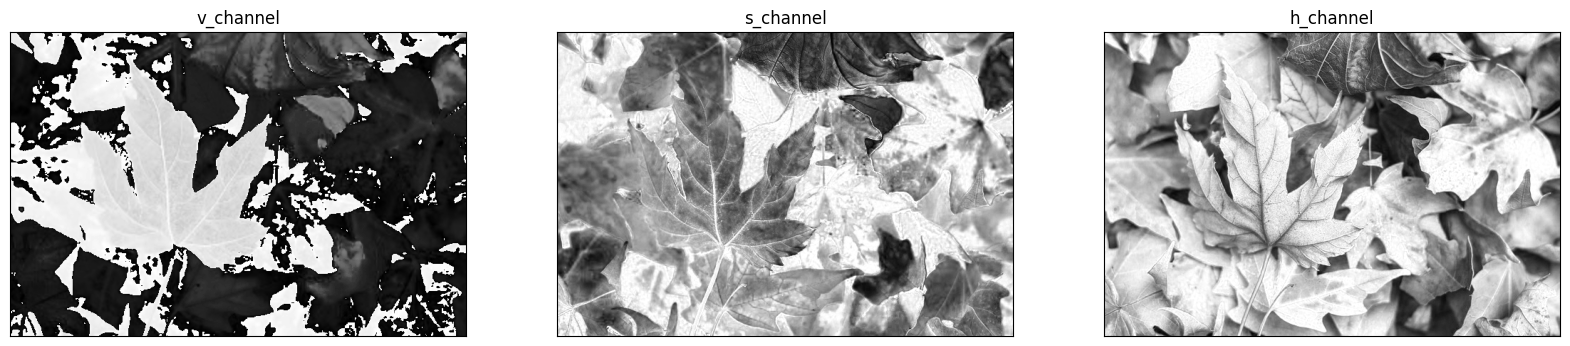

In [ ]:
image_list = []
image = cv2.imread(os.path.join('images/Q1', '1.jpg'))

#convert to hsv
hsv_image = convert_to_hsv(image)
#split to h , s , v channels
v_channel, s_channel, h_channel = cv2.split(hsv_image)

#show the channels
image_list.append([v_channel, 'v_channel', 'img'])
image_list.append([s_channel, 's_channel', 'img'])
image_list.append([h_channel, 'h_channel', 'img'])
plotter(image_list,1 , 3, True, 20, 10, '2A')


<h1>
<font color="#ff2e2e">
Finding Differences
</font>
</h1>

In [ ]:
def dif(image1, image2):
    '''
    Creates a new image that differences between two input images are shown.
    
    Parameters:
        image1 (numpy.ndarray): The first input image.
        image2 (numpy.ndarray): The second input image.
    
    Returns:
        numpy.ndarray: The result difference image.
    '''

    #convert size of image2 to image1
    image2 = cv2.resize(image2, (image1.shape[1] , image1.shape[0]))
  
    result = np.zeros((image1.shape[0], image1.shape[1], 3), dtype=np.uint8)
    
    # set the first color channel to image1
    result[:, :, 0] = image1
    
    # Set the second color channel to image2
    result[:, :, 1] = image2
    
    # Set the third color channel to image1
    result[:, :, 2] = image1
    
    return result

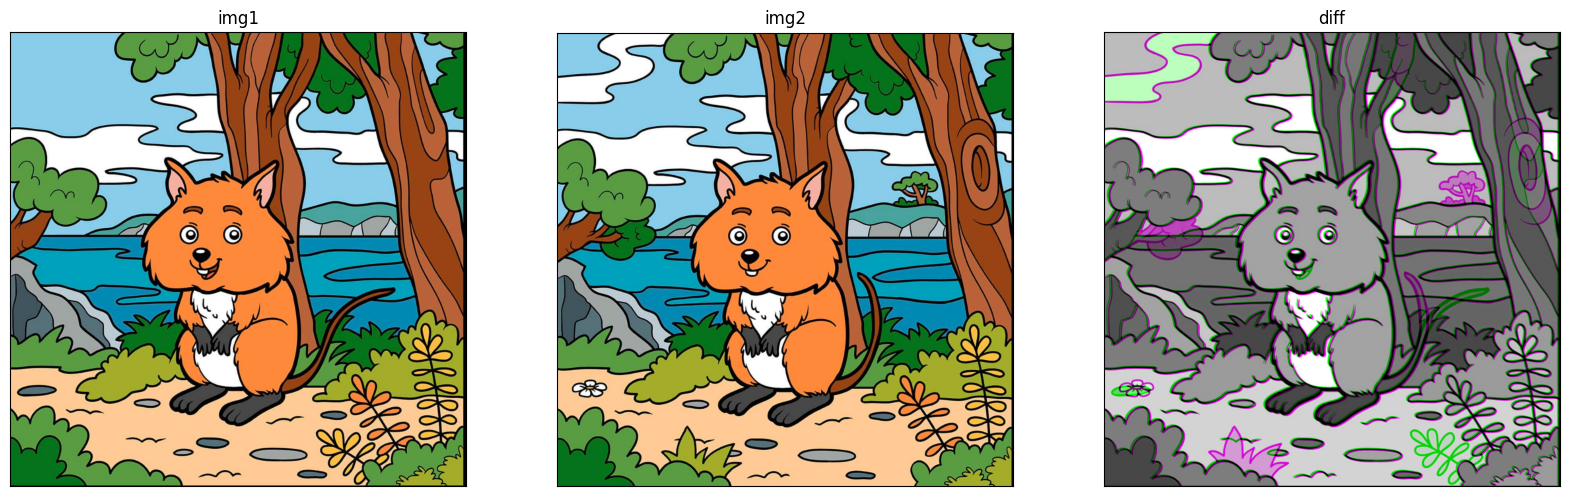

In [ ]:
image_list = []

image1 = cv2.imread(os.path.join('images/Q1', '2.png'))
image_list.append([cv2.cvtColor(image1, cv2.COLOR_BGR2RGB), 'img1', 'img'])
image2 = cv2.imread(os.path.join('images/Q1', '3.png'))
image_list.append([cv2.cvtColor(image2, cv2.COLOR_BGR2RGB), 'img2', 'img'])

image1 = cv2.imread(os.path.join('images/Q1', '2.png'), cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(os.path.join('images/Q1', '3.png'), cv2.IMREAD_GRAYSCALE)
image_list.append([dif(image1, image2), 'diff', 'img'])

plotter(image_list,1 , 3, True, 20, 10, '2B')